 ``<h1 style="color: DeepSkyBlue; text-align: center;">Customer Segmentation for Banking Marketing</h1> 

<h5 style="color: DeepSkyBlue; text-align: left;">Prepared By : Ibrahim Kerdi</h5>


*Goal : Identify distinct customer segments in our dataset to enable personalized marketing strategies, optimize resource allocation, and improve customer retention.*  


**Clustering helps businesses:**  
1. **Segment customers** by behavior, demographics, or preferences.  
2. **Target high-value groups** with tailored campaigns.  
3. **Reduce churn** by identifying at-risk clusters.  
4. **Optimize inventory** by grouping products with similar demand patterns.  
 
**Customer Segmentation**
**Objective**: Group customers into clusters based on purchasing habits.  
**Actionable Insights**:  
- **Cluster 1 (High spenders)**: Offer exclusive discounts to retain them.  
- **Cluster 2 (Inactive users)**: Launch re-engagement email campaigns.  
- **Cluster 3 (Bargain hunters)**: Promote budget-friendly products.  

**Translating Clustering Results to Business Value**  
 
 High-value customer clusters => Prioritize loyalty programs for these groups.                                       
 Low-engagement clusters      => Investigate pain points (e.g., survey these users).                                 

**Business Outcomes**  
1. **Increasing in conversion rates** by targeting high-spend clusters with premium offers.  
2. **Reduction in churn** by identifying disengaged customers and offering motivations.  
3. **Optimized ad spend** by focusing budgets on the most responsive clusters.  

**1. Load the Data**

In [1]:
import pandas as pd
data = pd.read_csv("./data/test.csv")

In [2]:
print(data.head(),"\n")
print(f"Dataset dimensions: {data.shape}")

  age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"
0  30;"unemployed";"married";"primary";"no";1787;...                                                                                                  
1  33;"services";"married";"secondary";"no";4789;...                                                                                                  
2  35;"management";"single";"tertiary";"no";1350;...                                                                                                  
3  30;"management";"married";"tertiary";"no";1476...                                                                                                  
4  59;"blue-collar";"married";"secondary";"no";0;...                                                                                                   

Dataset dimensions: (4521, 1)


In [3]:
df_train = pd.read_csv("./data/test.csv",sep=";")

In [4]:
df_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


**2. Basic Statistics**

Calculating basic statistics to understand the central tendencies, dispersion, and distribution of the data.


In [5]:
print("\n",df_train.describe(include=['object', 'category']))


                job  marital  education default housing  loan   contact month  \
count         4521     4521       4521    4521    4521  4521      4521  4521   
unique          12        3          4       2       2     2         3    12   
top     management  married  secondary      no     yes    no  cellular   may   
freq           969     2797       2306    4445    2559  3830      2896  1398   

       poutcome     y  
count      4521  4521  
unique        4     2  
top     unknown    no  
freq       3705  4000  


**Dropping y column since we are not using a classfication model**

In [6]:
if 'y' in df_train.columns:  
    df_train = df_train.drop(['y'], axis=1)  
    print("Column 'y' has been dropped.")  
else:  
    print("Column 'y' is not present, it's already imputed or does not exist.") 


Column 'y' has been dropped.


**2. Exploratory Data Analysis (EDA)**

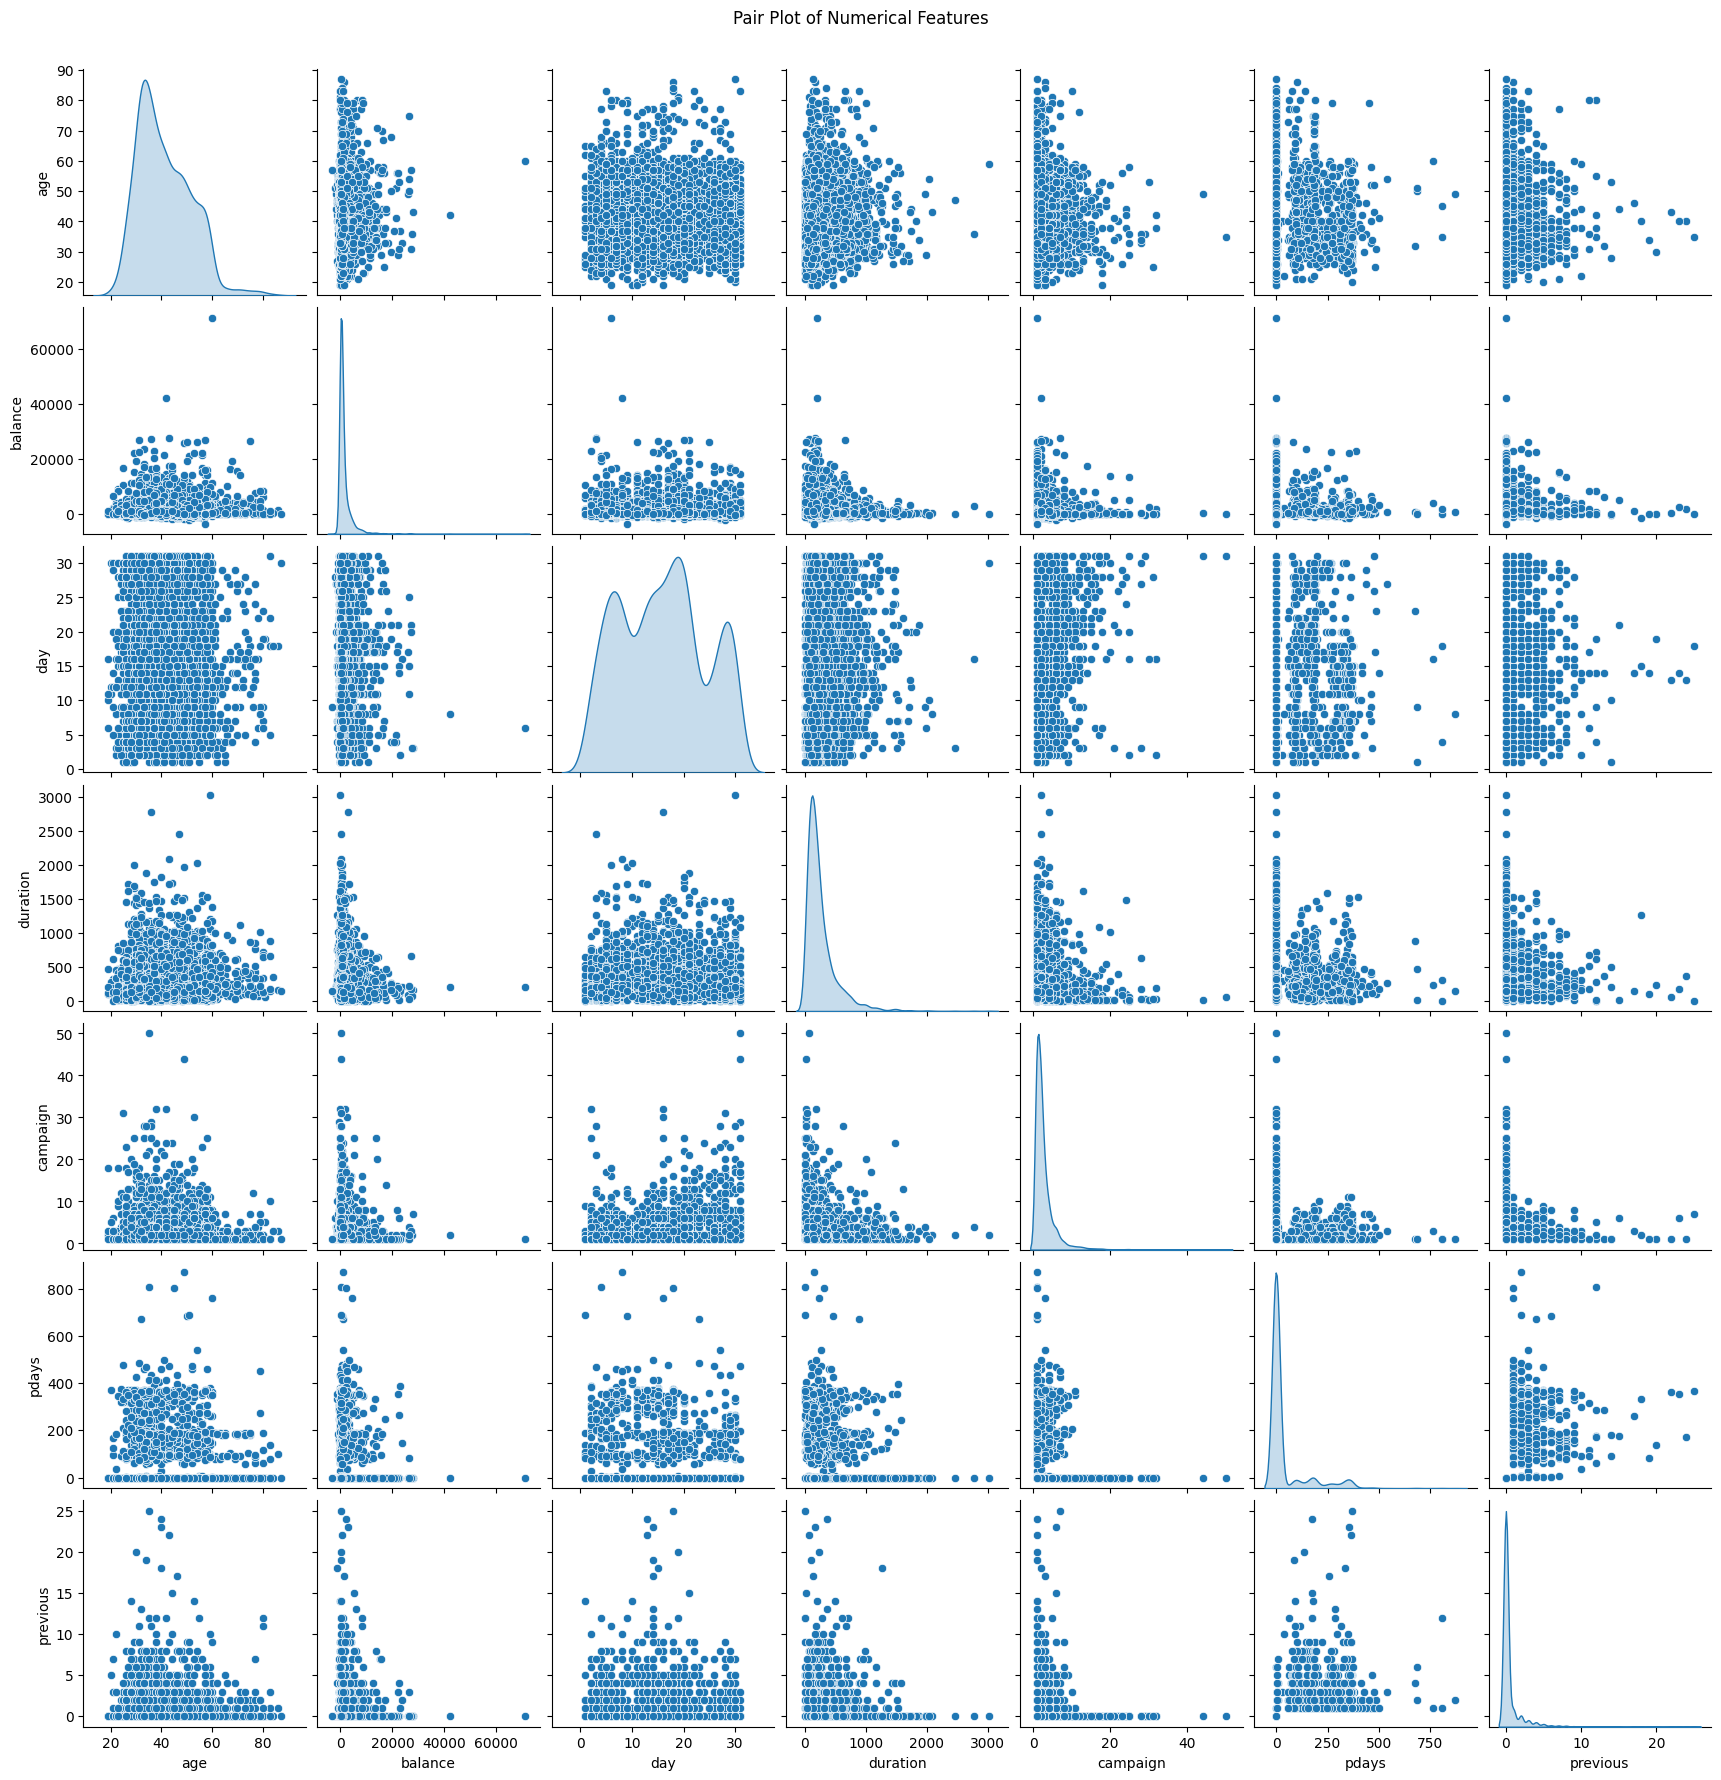

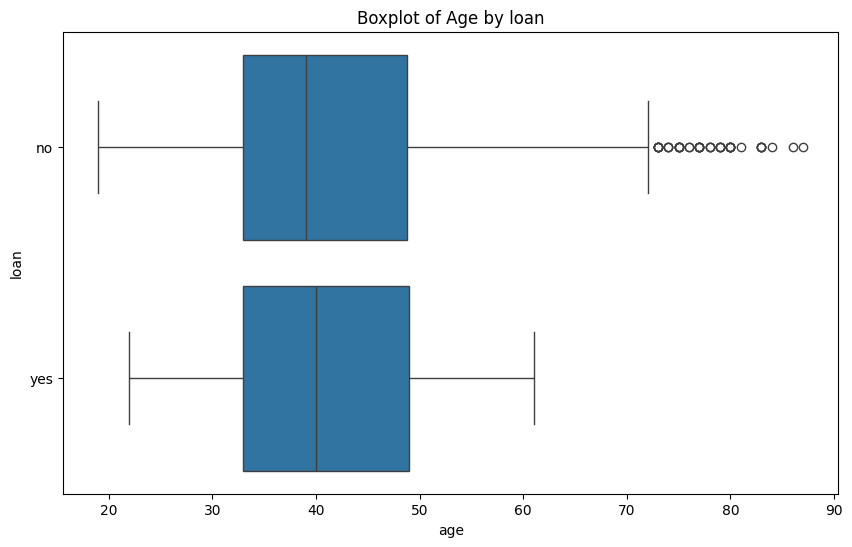

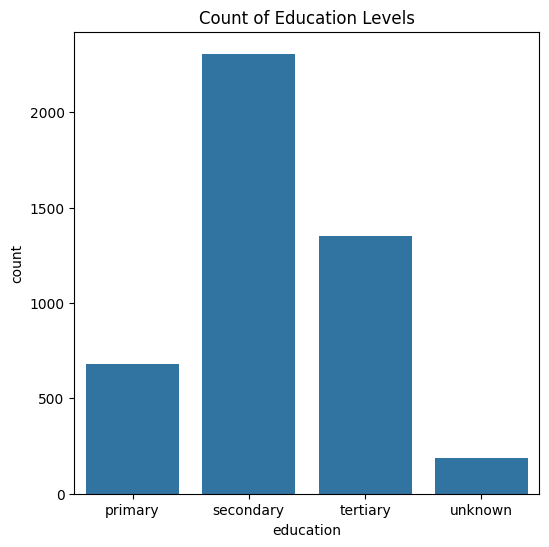

In [7]:
# A. Pair Plots
import seaborn as sns
import matplotlib.pyplot as plt

# Pair plot for numerical features
num_cols = df_train.select_dtypes(include=['int64', 'float64']).columns
sns.pairplot(df_train[num_cols], diag_kind='kde')
plt.suptitle("Pair Plot of Numerical Features", y=1.02)
plt.show()

print("\n")

# C. Boxplots
# Detect outliers and understand the distribution of numerical features across different categories.

print("\n")
plt.figure(figsize=(10, 6))
sns.boxplot(x='age', y='loan', data=df_train)
plt.title("Boxplot of Age by loan")
plt.show()

print("\n")


# D. Count Plots for Categorical Variables

plt.figure(figsize=(6, 6))
sns.countplot(x='education', data=df_train)
plt.title("Count of Education Levels")
plt.show()

print("\n")

**3. Check for Missing Values**


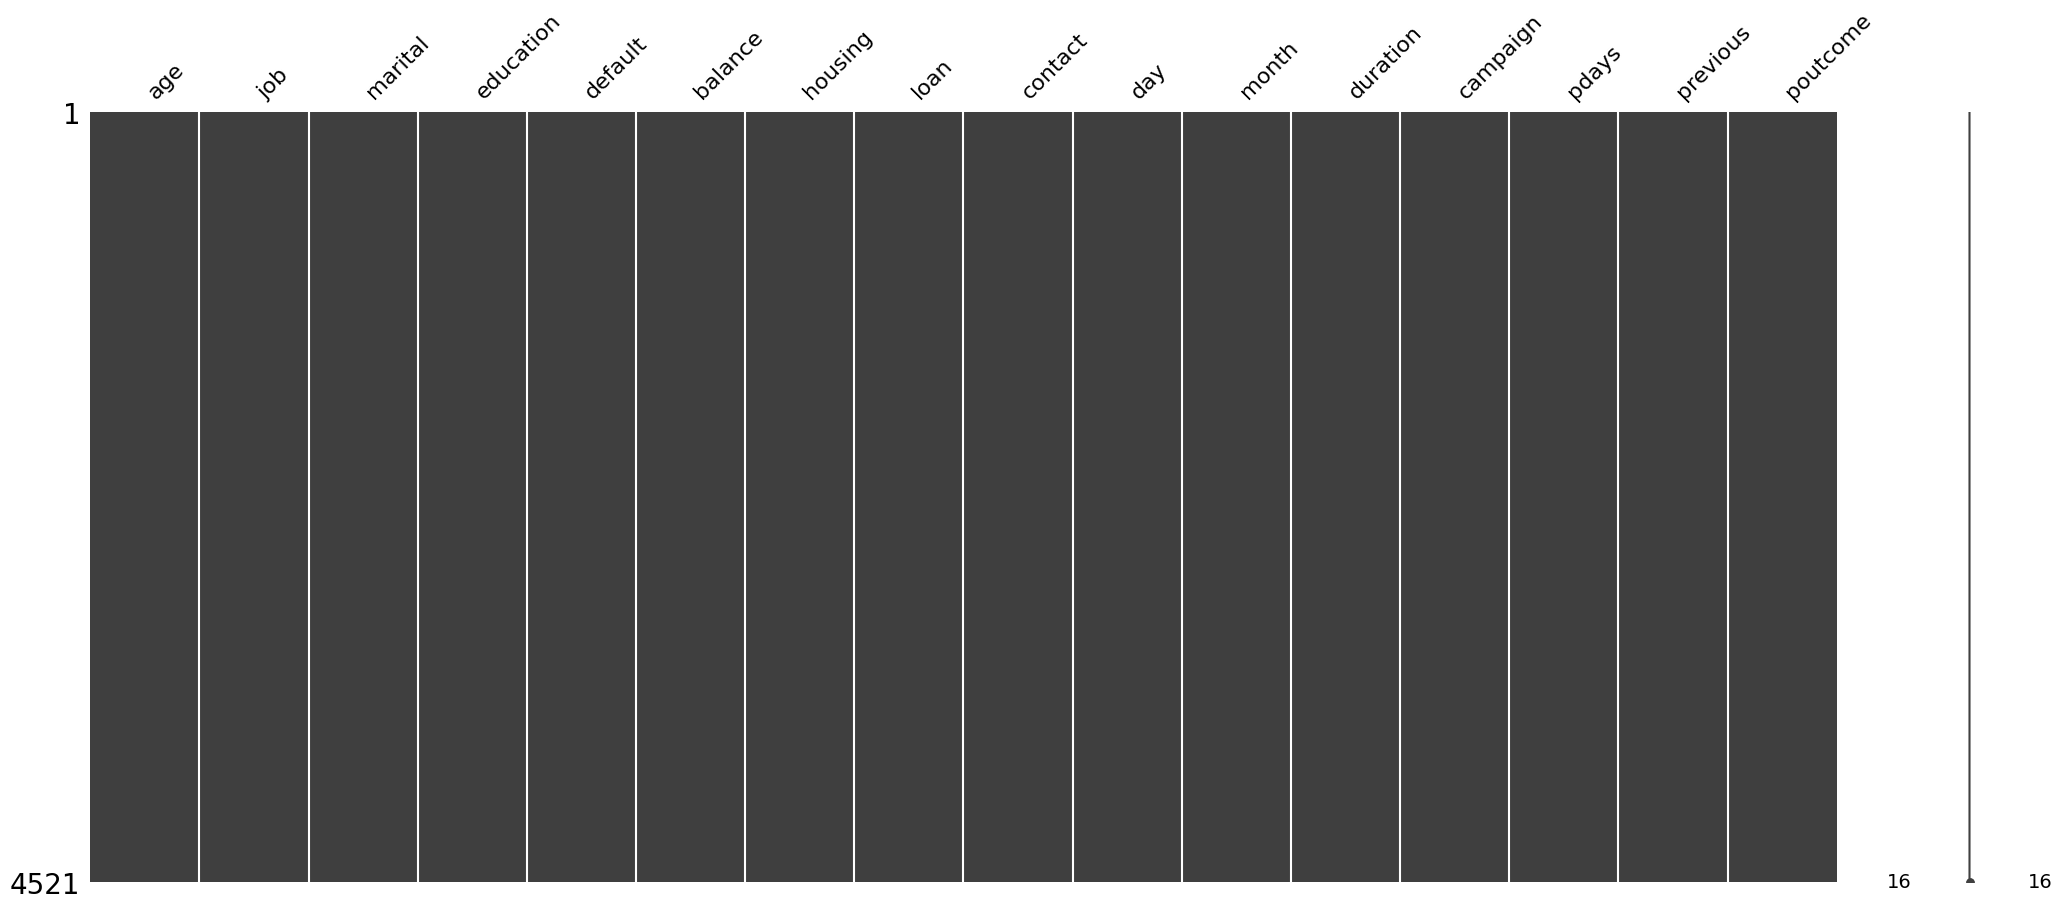

In [8]:
import missingno as msno
import matplotlib.pyplot as plt
msno.matrix(df_train)  # Overview of the missing data as a matrix
plt.show()

In [9]:
# Check for missing values
missing_values = df_train.isna().sum()
missing_values += (df_train ==' ').sum()
missing_values += (df_train == 'unknown').sum()
missing_values += (df_train == -1).sum()
missing_values += (df_train == 'NaN').sum()


print("Missing Values:\n", missing_values)

Missing Values:
 age             0
job            38
marital         0
education     187
default         0
balance         5
housing         0
loan            0
contact      1324
day             0
month           0
duration        0
campaign        0
pdays        3705
previous        0
poutcome     3705
dtype: int64


Since in columns "pdays" and "poutcome" there is 3705 missing values from 4251 , I decided to drop these 2 Columns.

In [10]:
df_train = df_train.drop(columns=['pdays','poutcome'])
df_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,4
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,1
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,0


In [11]:
import numpy as np


def inspect_missing(df_train):  
    print("Step 1: Count Total Missing Values")  
    missing_counts = df_train.isnull().sum()  
    print(missing_counts)  
    print("\nStep 2: Count Placeholder Missing Values (e.g., 'unknown', -1)")  
    
    # Count placeholders like 'unknown' and -1  
    placeholder_counts = {}  
    for col in df_train.select_dtypes(include=['object', 'float', 'int']).columns:  
        placeholder_counts[col] = df_train[col].isin(['unknown', -1]).sum()  
    placeholder_counts = pd.Series(placeholder_counts)  
    print(placeholder_counts)  
    
    return missing_counts, placeholder_counts  

missing_counts, placeholder_counts = inspect_missing(df_train)  


# Handle missing values  
## df_train_clean = handle_missing(df_train)  

print("\nCleaned DataFrame:")  
print(df_train)

# Numerical Features: Impute with mean or median.
# Categorical Features: Impute with mode or create a separate category like "Unknown".

Step 1: Count Total Missing Values
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
previous     0
dtype: int64

Step 2: Count Placeholder Missing Values (e.g., 'unknown', -1)
age             0
job            38
marital         0
education     187
default         0
balance         5
housing         0
loan            0
contact      1324
day             0
month           0
duration        0
campaign        0
previous        0
dtype: int64

Cleaned DataFrame:
      age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no     1787      no   no   
1      33       services  married  secondary      no     4789     yes  yes   
2      35     management   single   tertiary      no     1350     yes   no   
3      30     management  married   tertiary      no     1476     yes  yes   
4  

In [12]:
from sklearn.impute import SimpleImputer

# Impute numerical columns with median
num_cols = df_train.select_dtypes(include=['int64', 'float64']).columns
print(num_cols)
imputer_num = SimpleImputer(strategy='median')
df_train[num_cols] = imputer_num.fit_transform(df_train[num_cols])

# Impute categorical columns with mode
cat_cols = df_train.select_dtypes(include=['object', 'category']).columns
imputer_cat = SimpleImputer(strategy='most_frequent')
df_train[cat_cols] = imputer_cat.fit_transform(df_train[cat_cols])


Index(['age', 'balance', 'day', 'duration', 'campaign', 'previous'], dtype='object')


**Cheking For Duplicates**

In [13]:
duplicates = df_train.duplicated().sum()  
print(f"Number of duplicate rows: {duplicates}")  

Number of duplicate rows: 0


**Cheking for Outliers**

In [14]:
import pandas as pd  
import numpy as np  
from sklearn.cluster import KMeans  

# Identify outliers using Z-score 

num_cols = df_train.select_dtypes(include=['int64', 'float64']).columns
 
# Calculate Z-Score for each numerical column  
for col in num_cols:  
    mean = df_train[col].mean()  
    std = df_train[col].std()  
    df_train[f'z_score_{col}'] = np.abs((df_train[col] - mean) / std)  

# Remove outliers (Z-score > 2) for all numerical columns  
df_train_clean = df_train[(df_train[[f'z_score_{col}' for col in num_cols]] <= 2).all(axis=1)]   
df_train_clean = df_train_clean.drop([f'z_score_{col}' for col in num_cols], axis=1)  


In [15]:
df_train_clean.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous
0,30.0,unemployed,married,primary,no,1787.0,no,no,cellular,19.0,oct,79.0,1.0,0.0
2,35.0,management,single,tertiary,no,1350.0,yes,no,cellular,16.0,apr,185.0,1.0,1.0
3,30.0,management,married,tertiary,no,1476.0,yes,yes,unknown,3.0,jun,199.0,4.0,0.0
4,59.0,blue-collar,married,secondary,no,0.0,yes,no,unknown,5.0,may,226.0,1.0,0.0
5,35.0,management,single,tertiary,no,747.0,no,no,cellular,23.0,feb,141.0,2.0,3.0


**Cheking for unique Values in Dataframe to encoding step** 

In [16]:
unique_values = df_train_clean.nunique()  
print(unique_values)

age            42
job            12
marital         3
education       4
default         2
balance      1991
housing         2
loan            2
contact         3
day            31
month          12
duration      687
campaign        9
previous        4
dtype: int64


Since our Categorical variables in this dataset with a small number of unique values, Label Encoder can be used to convert it into a numerical variable.

In [17]:
from sklearn.preprocessing import LabelEncoder  

# Apply label encoding to each categorical column  
categorical_cols = df_train_clean.select_dtypes(include=['object']).columns  
for col in categorical_cols:  
    df_train_clean[col] = LabelEncoder().fit_transform(df_train_clean[col])

In [18]:
df_train_clean.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous
0,30.0,10,1,0,0,1787.0,0,0,0,19.0,10,79.0,1.0,0.0
2,35.0,4,2,2,0,1350.0,1,0,0,16.0,0,185.0,1.0,1.0
3,30.0,4,1,2,0,1476.0,1,1,2,3.0,6,199.0,4.0,0.0
4,59.0,1,1,1,0,0.0,1,0,2,5.0,8,226.0,1.0,0.0
5,35.0,4,2,2,0,747.0,0,0,0,23.0,3,141.0,2.0,3.0


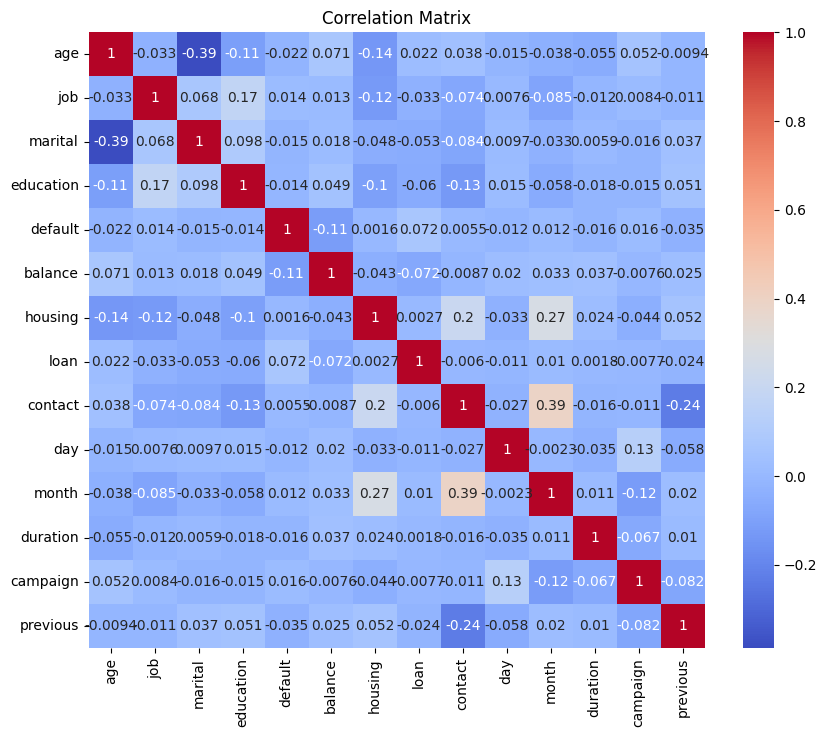

In [19]:
corr_matrix = df_train_clean.corr()  
plt.figure(figsize=(10,8))  
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)  
plt.title('Correlation Matrix')  
plt.show()  

**Dimensionality Reduction and Visualization using PCA**


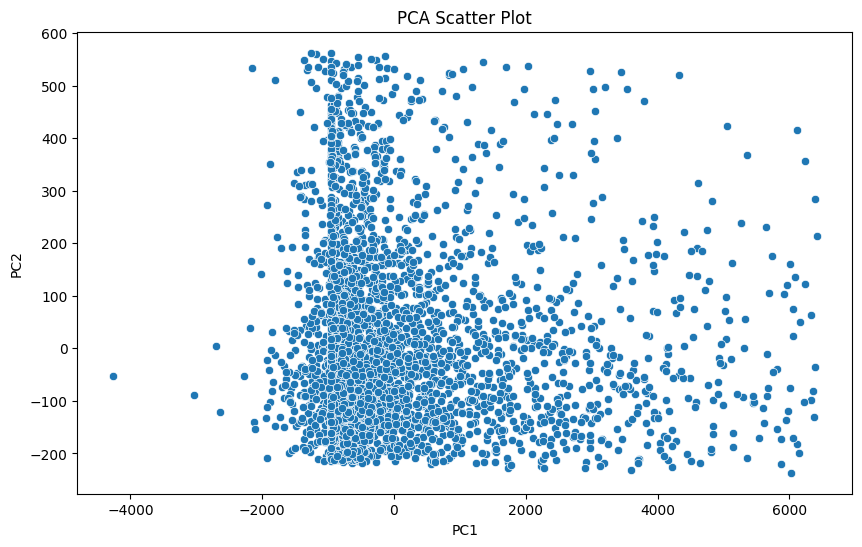

In [20]:
# F. Scatter Plots for Potential Clusters
# Just for testing ,there is no high correlated features in our dataset


from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_train_clean[num_cols])

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.title("PCA Scatter Plot")
plt.show()

In [21]:
print(pca_df)

              PC1         PC2
0      828.600098 -149.123761
1      392.068339  -41.232474
2      518.124280  -27.744072
3     -957.730060    5.589825
4     -211.116831  -82.617521
...           ...         ...
3716   246.461321 -180.617391
3717  -483.012155  401.604630
3718 -1290.287156  110.076947
3719 -4271.016873  -52.974340
3720   178.821864  -96.264526

[3721 rows x 2 columns]


## Data Preprocessing

Are Features on the Same Scale? Critical for distance-based algorithms like K-Means.

In [22]:
from sklearn.preprocessing import StandardScaler
num_cols = df_train_clean.select_dtypes(include=['int64', 'float64']).columns  
scaler = StandardScaler()
for col in num_cols:  
    df_train_clean[col] = scaler.fit_transform(df_train_clean[[col]])

In [23]:
df_train_clean.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous
0,-1.096683,10,1,0,0,0.570143,0,0,0,0.385987,10,-0.866116,-0.805778,-0.358565
2,-0.572608,4,2,2,0,0.269687,1,0,0,0.023753,0,-0.235316,-0.805778,1.168004
3,-1.096683,4,1,2,0,0.356317,1,1,2,-1.545926,6,-0.152003,0.969764,-0.358565
4,1.942948,1,1,1,0,-0.658497,1,0,2,-1.304437,8,0.008673,-0.805778,-0.358565
5,-0.572608,4,2,2,0,-0.144902,0,0,0,0.868965,3,-0.497158,-0.213930,4.221143


Using TSNE : 

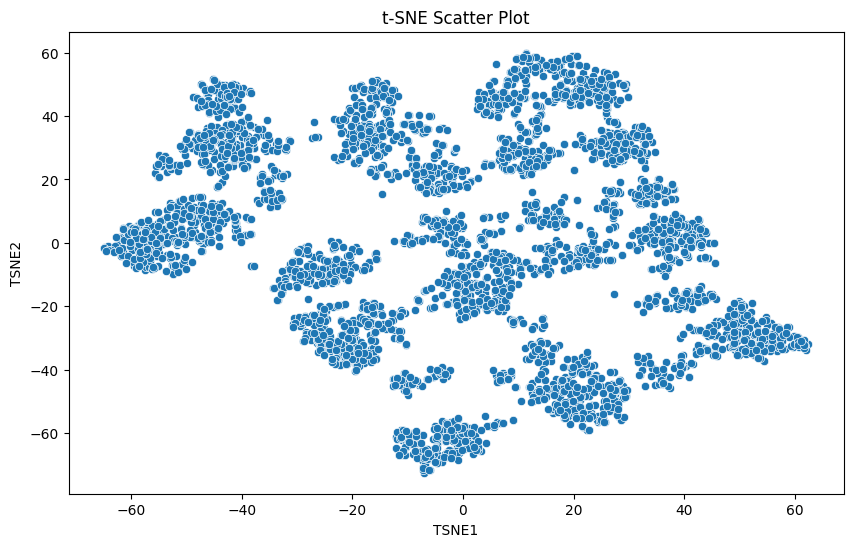

In [24]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(df_train_clean)

tsne_df = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', data=tsne_df)
plt.title("t-SNE Scatter Plot")
plt.show()

 Identify Outliers That Might Affect Clustering

Identify Correlated Features That Could Cause Multicollinearity?

In [25]:
high_corr = corr_matrix[(corr_matrix > 0.8) & (corr_matrix < 1.0)].stack().reset_index()
print(high_corr)

Empty DataFrame
Columns: [level_0, level_1, 0]
Index: []



# **Step 3: Train Multiple Clustering Models**


# Model : K-Means


In [26]:
"""
Selecting Optimal K:
   - Using the **Elbow Method** (plot inertia vs. K).
   - Usimg the **Silhouette Score** to validate K.
"""
from sklearn.cluster import KMeans
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k).fit(df_train_clean)
    inertia.append(kmeans.inertia_)



# Train Model

kmeans = KMeans(n_clusters=3).fit(df_train_clean)
labels_kmeans = kmeans.labels_



# Model 2: DBSCAN


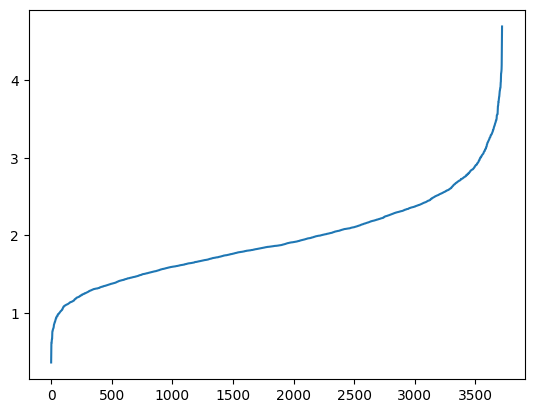

In [27]:
"""Tune Parameters:
   - eps (neighborhood radius) and min_samples (minimum points to form a cluster).
   - Use a k-distance plot to estimate eps.
   - Look for the "knee" to choose eps 
   """
import numpy as np

from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=5).fit(df_train_clean)
distances, _ = nn.kneighbors(df_train_clean)
distances = np.sort(distances[:, -1], axis=0)
plt.plot(distances)  

#Train Model

from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5).fit(df_train_clean)
labels_dbscan = dbscan.labels_




# Model 3: Hierarchical Clustering


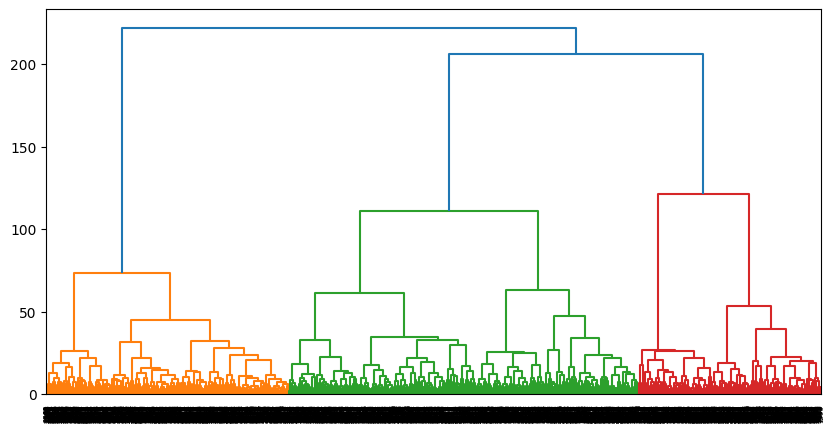

In [28]:
# Linkage Method : Ward (minimizes variance), average, or complete linkage.
# Dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(df_train_clean, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.show()
 
# Cut the Dendrogram to get clusters
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=3).fit(df_train_clean)
labels_agg = agg.labels_




# **Evaluate Clusters Metrics**


In [29]:
#### **Metrics**
# Silhouette Score (higher = better separation)
  
from sklearn.metrics import silhouette_score
print(f"K-Means silhouette_score: {silhouette_score(df_train_clean, labels_kmeans)}")
print(f"DBSCAN silhouette_score: {silhouette_score(df_train_clean, labels_dbscan)}")
print(f"AgglomerativeClustering silhouette_score: {silhouette_score(df_train_clean, labels_agg)}")

# Calinski-Harabasz Index** (higher = better):

from sklearn.metrics import calinski_harabasz_score
print(f"\nK-Means calinski_harabasz_score: {calinski_harabasz_score(df_train_clean, labels_kmeans)}")
print(f"DBSCAN calinski_harabasz_score: {calinski_harabasz_score(df_train_clean, labels_dbscan)}")
print(f"AgglomerativeClusteringdavies_calinski_harabasz: {calinski_harabasz_score(df_train_clean, labels_agg)}")

# Davies-Bouldin Index (lower = better):
   
from sklearn.metrics import davies_bouldin_score
print(f"\nK-Means davies_bouldin_score: {davies_bouldin_score(df_train_clean, labels_kmeans)}")
print(f"DBSCAN davies_bouldin_score: {davies_bouldin_score(df_train_clean, labels_dbscan)}")
print(f"AgglomerativeClustering davies_bouldin_score: {davies_bouldin_score(df_train_clean, labels_agg)}")



K-Means silhouette_score: 0.29203377078145654
DBSCAN silhouette_score: 0.09004173309028377
AgglomerativeClustering silhouette_score: 0.25830660793789845

K-Means calinski_harabasz_score: 1649.2724617892252
DBSCAN calinski_harabasz_score: 8.24064326803966
AgglomerativeClusteringdavies_calinski_harabasz: 1478.1430789771007

K-Means davies_bouldin_score: 1.164424557436371
DBSCAN davies_bouldin_score: 0.7925194404911708
AgglomerativeClustering davies_bouldin_score: 1.3243557111298838


**1. Silhouette Score**
- Foundation: Silhouette Score measures the quality of clusters by analyzing the distances between data points within the same cluster (*cohesion*) and data points in different clusters (*separation*).

- How it works:
  - A score closer to **1** means that clusters are well-separated and compact.
  - A score closer to **-1** means points are often assigned to the wrong clusters.
  - A score around **0** means clusters overlap significantly, and points are ambiguously classified.

  
**2. Calinski-Harabasz Index**

- Foundation: The Calinski-Harabasz (CH) Index measures the ratio between the between-cluster dispersion (how far apart cluster centroids are) and within-cluster dispersion (how compact clusters are).

- How it works: Higher values are *better*, as they indicate more compact clusters that are well-separated.


**3. Davies-Bouldin Index**
- Foundation:The Davies-Bouldin (DB) Index measures cluster compactness (tightness of clusters) and separation (distance between clusters).
- How it works: Lower values are *better* as they indicate tighter within-cluster distances and greater between-cluster distances.


### Model Evaluation


1. **K-Means Clustering**:
   - Silhouette Score : 0.2924 => A score closer to 1 suggests better-defined clusters, and a score closer to 0 indicates overlapping clusters.
   - Calinski-Harabasz Index: 1649.27 => A higher score suggests better-defined clusters, indicating that the K-Means model is performing reasonably well in producing distinct clusters.
   - Davies-Bouldin Index: 1.1644 => The score suggests room for improvement in how distinct the clusters are.

2. **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**:
   - Silhouette Score: 0.0900 => This low score implies that the clusters formed are poorly separated, indicating potential overlap or noise in the data.
   - Calinski-Harabasz Index: 8.2406 => The score suggests that the clusters are not well-separated, indicating that this method might not be ideal for this particular dataset.
   - Davies-Bouldin Index: 0.79 => Shows that the clusters are somewhat distinguishable but still suggests potential for improvement.

3. **Agglomerative Clustering**:
   - Silhouette Score: 0.2583 => Similar to K-Means, this score also reflects moderate cluster separation.
   - Calinski-Harabasz Index: 1478.14 => Indicates reasonably well-defined clusters, performing better than DBSCAN.
   - Davies-Bouldin Index: 1.3244 => Shows that the clusters are somewhat distinguishable but still suggests potential for improvement.

#### Summary

- **Best Performer**: K-Means appears to be the best performing model overall based on the Calinski-Harabasz index and Davies-Bouldin index.
- **Worst Performer**: DBSCAN shows the weakest performance in terms of both silhouette score and Davies-Bouldin index, implying it may struggle with the dataset.
- **Agglomerative Clustering** is in between, performing better than DBSCAN but not quite matching K-Means.

#### Recommendations

1. **K-Means** may be the best option for further analysis, given its relatively favorable scores.
2. Consider tuning parameters or exploring other algorithms if the clustering results need improvement.
3. No model is strong as desired to put it in infernce.


**Final Deliverable**  
  
1. *Objective*: "Improve customer retention and revenue through data-driven segmentation."  
2. *Clusters Identified*: 3 segments with clear profiles.  
3. **Recommendations for Enhance Business Growth**:  
   - Launch a VIP program for high-value clusters.  
   - Retarget inactive users with a 10% discount code.
   - Target Marketing: Focusing marketing efforts on specific segments identified through segmentation, such as high-value customers and inactive users.
   - Loyalty Program: A structured marketing strategy designed to encourage repeat business by rewarding customers for their loyalty with benefits or incentives.
   - Retention Marketing: Strategies aimed at retaining existing customers, particularly those who may be inactive, by re-engaging them with offers or personalized communications.
   - Personalization: Tailoring marketing messages and offers to individual customers based on their preferences and behaviors to improve engagement.
   - Promotional Campaign: A series of coordinated marketing efforts, such as email marketing with discount codes, aimed at driving immediate actions from customers.
   - Performance Metrics (KPIs): Key Performance Indicators used to measure the effectiveness of the implemented strategies, such as discount code redemption rates and customer engagement levels.
   - Customer Feedback Loop: A process of gathering and analyzing customer feedback to continuously improve products, services, and marketing strategies

